## Employee Exit Survey Analysis

In this project, we'll be analyzing employee exit surveys based on the [DETE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [TAFE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) survey datasets.

We want to understand:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 150 # to avoid truncated output 

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")



In [2]:
print(dete_survey.shape)

(822, 56)


In [3]:
print(tafe_survey.shape)

(702, 72)


In [4]:
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [6]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

## Findings

* The DETE survey contains "Not Stated" string values that really should encode to NaN values
* Both the DETE and TAFE survey both contain many more columsn than we need
* Eac survey contains many duplicate columns under different names
* There are multiple colums indicating dissatisfaction

In [8]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [9]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop unnecessary columns

dete_drop_cols = dete_survey.columns[28:49]

tafe_drop_cols = tafe_survey.columns[17:66]

dete_survey_updated = dete_survey.drop(dete_drop_cols,axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_drop_cols,axis=1)

In [11]:
# Standardize column names
# Make them lowercase, trim whitespace and replace spaces with "_"
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")

tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")

In [12]:
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._what_is_your_gender?', 'currentage._current_age',
       'employment_type._employment_type', 'classification._classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'],
      dtype='obje

In [13]:
tafe_rename_dict = {'Record ID': 'id',
                    'cessation_year': 'cease_date',
                    'reason_for_ceasing_employment': 'separationtype',
                    'gender._what_is_your_gender?': 'gender',
                    'currentage._current_age': 'age',
                    'employment_type._employment_type': 'employment_status',
                    'classification._classification': 'position',
                    'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'institute_service',
                    'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)': 'role_service'
                   }

In [14]:
tafe_survey_updated.rename(tafe_rename_dict,axis=1,inplace=True)

tafe_survey_updated.head()

,record_id,institute,workarea,cease_date,separationtype,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Data Transformations

We made the above column cleaning and transformations so we can combine our two datasets.

Below we'll filter our data to only resignations

In [15]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
tafe_resigns = tafe_survey_updated["separationtype"] == "Resignation"

tafe_resignations = tafe_survey_updated[tafe_resigns].copy()

tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [18]:
pattern = r"(Resignation)"
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.extract(pattern).notnull()].copy()

dete_resignations["separationtype"] = "Resignation"

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [19]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [20]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype("float")

In [22]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
tafe_resignations["cease_date"].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [103]:
tafe_resignations["cease_date"].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [104]:
dete_resignations["cease_date"].value_counts().sort_values()

2010         1
07/2012      1
07/2006      1
09/2010      1
05/2012      2
05/2013      2
08/2013      4
10/2013      6
07/2013      9
11/2013      9
09/2013     11
06/2013     14
12/2013     17
01/2014     22
2013        74
2012       126
Name: cease_date, dtype: int64

## Years of Cease Dates

Overall there's not any glaring data discrepancy issues with the year, but there are more years in the dete_survey vs the tafe survey.

Since our analysis is looking overall in aggregate and not by year we don't need to make any decisions or remove any data based on the year data quality.

## Years of Service

One of our main questions is:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Due to this, we need lengths of service. We have this in our tafe_resignations dataframe, but not on our dete_resignations dataframe, so we'll have to create it.


In [27]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [28]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
record_id                                              340 non-null float64
institute                                              340 non-null object
workarea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
contributing_factors._career_move_-_public_sector      332 non-null object
contributing_factors._career_move_-_private_sector     332 non-null object
contributing_factors._career_move_-_self-employment    332 non-null object
contributing_factors._ill_health                       332 non-null object
contributing_factors._maternity/family                 332 non-null object
contributing_factors._dissatisfaction                  332 non-null object
contributing_factors._job_dissatisfaction              332 non-null 

In [29]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

## Measuring Dissatisfaction

To measure the dissatisfaction, we'll use the following from the two surveys;

TAFE:

* contributing_factors._dissatisfaction
* contributing_factors._job_dissatisfaction

DETE

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

We'll mark any of the employees that meet the above conditions as dissatisfied


In [30]:
cols = ["contributing_factors._dissatisfaction",
       "contributing_factors._job_dissatisfaction"]

for col in cols:
    print(tafe_resignations[col].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors._dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: contributing_factors._job_dissatisfaction, dtype: int64


In [31]:
def update_vals(row):
    if row == "-":
        return False
    elif pd.isnull(row):
        return np.nan
    else:
        return True
    


In [32]:
cols = ["contributing_factors._dissatisfaction",
       "contributing_factors._job_dissatisfaction"]
tafe_resignations[cols].applymap(update_vals).any(axis=1,skipna=False)

tafe_resignations["dissatisfied"] = tafe_resignations[cols].applymap(update_vals).any(axis=1,skipna=True)

tafe_resignations["dissatisfied"].value_counts(dropna=False)



False    249
True      91
Name: dissatisfied, dtype: int64

In [33]:
cols = ["job_dissatisfaction", 
        "dissatisfaction_with_the_department",
        "physical_work_environment",
        "lack_of_recognition",
        "lack_of_job_security",
        "work_location",
        "employment_conditions",
        "work_life_balance",
        "workload"
       ]

dete_resignations["dissatisfied"] = dete_resignations[cols].any(axis=1,skipna=False)

dete_resignations_up = dete_resignations.copy()

tafe_resignations_up = tafe_resignations.copy()

In [34]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)     

combined.notnull().sum().sort_values()                 

In [44]:
combined_updated = combined.dropna(axis=1,thresh=500).copy()

In [45]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         651
institute            651
separationtype       651
dtype: int64

## Understanding Years of Service

1. We'll take the institute_service column, convert it to string, and extract the numerical value from it.

1. We'll then take those values and convert it into the following categories:
  * New: Less than 3 years at a company
  * Experienced: 3-6 years at a company
  * Established: 7-10 years at a company
  * Veteran: 11 or more years at a company


In [47]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str")

In [59]:
combined_updated["institute_service"].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
22.0                   6
10.0                   6
17.0                   6
14.0                   6
12.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
28.0                   2
25.0                   2
26.0                   2
36.0                   2
30.0                   2


In [71]:
pattern = r"(\d+)"
combined_updated["institute_service"] = combined_updated["institute_service"].str.extract(pattern).astype("float")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [79]:
def convert_years_to_categories(row):
    if pd.isnull(row):
        return np.nan
    elif row < 3:
        return "New"
    elif row > 3 and row <= 6:
        return "Experienced"
    elif row > 6 and row <= 10:
        return "Established"
    elif row > 10:
        return "Veteran"
    


In [80]:
combined_updated["institute_service"].value_counts().sort_values()

31.0      1
29.0      1
38.0      1
42.0      1
27.0      1
33.0      1
35.0      1
49.0      1
34.0      1
41.0      1
26.0      2
25.0      2
36.0      2
28.0      2
30.0      2
32.0      3
21.0      3
19.0      3
39.0      3
24.0      4
23.0      4
18.0      5
16.0      5
22.0      6
14.0      6
12.0      6
10.0      6
17.0      6
15.0      7
8.0       8
13.0      8
9.0      14
2.0      14
4.0      16
6.0      17
20.0     17
0.0      20
11.0     30
7.0      34
5.0      56
3.0      83
1.0     159
Name: institute_service, dtype: int64

In [81]:
combined_updated["service_category"] = combined_updated["institute_service"].apply(convert_years_to_categories)



In [82]:
combined_updated["service_category"].value_counts()

New            193
Veteran        136
Experienced     89
Established     62
Name: service_category, dtype: int64

In [83]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [89]:
dissatisfied_pct= combined_updated.pivot_table(index="service_category", values="dissatisfied")

dissatisfied_pct

,dissatisfied
service_category,
Established,0.516129
Experienced,0.404494
New,0.295337
Veteran,0.485294


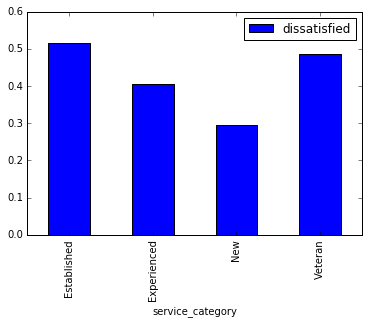

In [88]:
%matplotlib inline

dissatisfied_pct.plot(kind="bar")

## Results

Based on a cursory glance at the overall aggregated instances of dissatisfaction per group, we can see that as employees tend to get more experienced, their levels of dissatisfaction goes up, so we can see that it doesn't appear that younger employees are more dissatisfied than others